In [50]:
import cv2
import numpy as np
import os
import scipy.io as io
import matplotlib.pyplot as plt
import pickle

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers

import random
from tqdm import tqdm
from scipy.spatial.transform import Rotation

In [2]:
IMG_SIZE=64

In [38]:
ycb_path = "C:/Users/mati/Desktop/Moje/dyplomowa/datasets/ycb_video_sicrod"
datasets_path = "C:/Users/mati/Desktop/Moje/dyplomowa/datasets/"

In [9]:
types = os.listdir(ycb_path)

In [ ]:
def get_mask(mat):
    f_shape = [240,320]

    joint_masks = []
    joint_idx = 0
    joints_number = 15
    
    for joint_idx in range(joints_number):
        
        mask = np.zeros((IMG_SIZE,IMG_SIZE))
        try:
            x = mat["pos_img"][0][joint_idx][int(frames_count*0.85)]
            y = mat["pos_img"][1][joint_idx][int(frames_count*0.85)]
        except:
            x = mat["pos_img"][0][joint_idx][-1]
            y = mat["pos_img"][1][joint_idx][-1]
        
        x = int(x/(f_shape[1]/IMG_SIZE))
        y = int(y/(f_shape[0]/IMG_SIZE))
        color = (255,255,255)
        mask = cv2.circle(mask,(x,y),7,color, -1)
        joint_masks.append(mask/255.)

        
    joint_masks = np.array(joint_masks)
    joint_masks = np.swapaxes(joint_masks, 0,-1)
    joint_masks = np.swapaxes(joint_masks, 0,1)
            
    return joint_masks

In [159]:
mat_name = "000001-meta.mat"
frame_name = "000001-color.png"
poses_path = os.path.join(datasets_path,"035_power_drill.txt")
some_mat_path = os.path.join(ycb_path,types[0],file_name)
some_img_path = os.path.join(ycb_path,types[0],frame_name)
mat = io.loadmat(some_mat_path)
frame = cv2.imread(some_img_path)

In [42]:
poses = np.loadtxt(poses_path)

In [44]:
poses.shape

(27883, 7)

In [54]:
K1 = np.array([[1.066778e+03, 0.000000e+00, 3.129869e+02],
               [0.000000e+00, 1.067487e+03, 2.413109e+02],
               [0.000000e+00, 0.000000e+00, 1.000000e+00]])

K2 = np.array([[1077.836, 0, 323.7872],
               [0, 1078.189, 279.6921],
               [0,        0,        1]])

In [ ]:
def get_x_y(verts, idx):
    t = poses[idx][4:,None]
    quat = -np.array([*poses[idx][1:4], poses[idx][0]])
    R = np.array(Rotation.from_quat(quat).as_matrix())

    K_ = K1 if idx <= 23820 else K2

    verts_2d = np.matmul(K_, np.matmul(R, verts.T) + t).T
    verts_2d = verts_2d[:,:2] / verts_2d[:,2,None]
    return verts_2d

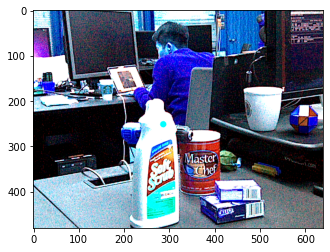

In [178]:
frame
color = (0,255,255)
x = int(point[0])
y = int(point[1])
fram_driller = cv2.circle(frame,(x,y),7,color, -1)
plt.imshow(fram_driller)

In [233]:
verts = [
        [-0.01,0,0],
        [0.08,0.05,0.0],
        [-0.1,0.045,0.0],
        [-0.03,-0.11,0.023],
        [-0.03,-0.11,-0.023],
        [0.055,-0.11,0.023],
        [0.055,-0.11,-0.023]
        ]
verts  = np.array(verts)

In [239]:
cv2.destroyAllWindows()

dir_1 = os.path.join(ycb_path,types[1])

idx = 0

for dir_type in types:
    dir_1 = os.path.join(ycb_path,dir_type)
    for file_name in os.listdir(dir_1):
        if "depth" in file_name:
            
            
            if idx % 1 == 0:
                some_img_path = os.path.join(dir_1,file_name)
                frame = cv2.imread(some_img_path)

                fram_driller = frame.copy()
                points = get_x_y(verts, idx)
                for point in points:
                    x = int(point[0])
                    y = int(point[1])
                    fram_driller = cv2.circle(fram_driller,(x,y),7,color, -1)

                cv2.imshow("window1", fram_driller)
                cv2.waitKey(1)
            idx += 1
    cv2.destroyAllWindows()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/mati/Desktop/Moje/dyplomowa/datasets/ycb_video_sicrod\\0006'

In [240]:
cv2.destroyAllWindows()


In [164]:
frame_name = "00000"+str(idx)+"-color.png"

In [165]:
frame_name

'0000010-color.png'

In [173]:
dir_1

'C:/Users/mati/Desktop/Moje/dyplomowa/datasets/ycb_video_sicrod\\0006'